# Exercise 3: Learning from Data

In this exercise, you will train different types of regression and classification models on two datasets. You will be graded based on a combination of your code producing the expected results, your written responses to the questions and a passing leaderboard score in the final exercise.

### 3.1 Linear / Logistic Regression for digit recognition

In this part you will experiment with two different types of prediction models, and qualitatively + quantitatively compare them. You will be working with the classic MNIST dataset, which we can load from `sklearn.datasets`.

In [1]:
# Importing the dataset
from sklearn import datasets
digits = datasets.load_digits();

Here we plot the first few digits and their labels. Apparently they are in order, but our upcoming models will not rely on this.

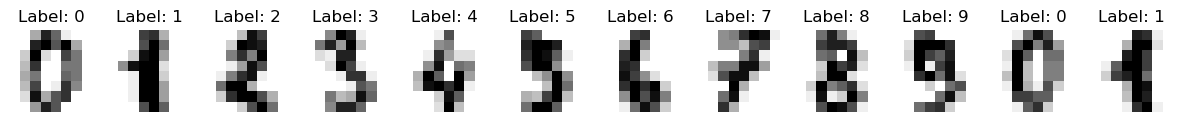

In [2]:
import matplotlib.pyplot as plt

_, axes = plt.subplots(nrows=1, ncols=12, figsize=(15, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Label: %i" % label)

### A: Warmup Exercise

Use the `train_test_split` function from `sklearn.model_selection` twice to split the data into train, validation, and test sets, with a distribution of 80%, 10%, and 10% respectively. Use `random_state=0` for reproducibility.
Check out the documentation to figure out how to set the parameters to get the desired split. 

In [3]:
# INSERT YOUR CODE HERE. ASSIGN TO THE FOLLOWING VARIABLES, X_train, X_val, X_test, y_train, y_val, y_test
# >
from sklearn.model_selection import train_test_split
(X_train, X_temp, y_train, y_temp) = train_test_split(digits.data, digits.target, test_size=0.2, random_state=0, shuffle = True)
(X_val, X_test, y_val, y_test) = train_test_split(X_temp, y_temp, test_size=0.5, random_state=0, shuffle = True)

Now let's check out the returned training data, which is of the type `numpy.ndarray`, which you might have seen already. We want to make sure the classes are balanced, e.g. we don't have a lot more 4's than 5's.
 - How many images do we have for the train, validation, and test sets?
 - What is the distribution of the training labels? Comment on whether the classes are balanced.

In [4]:
# CALCULATE AND WRITE YOUR ANSWERS HERE
# >
import numpy
print('# of images:')
print('X_train : ' + str(X_train.shape[0]))
print('X_test : ' + str(X_test.shape[0]))
print('X_val : ' + str(X_val.shape[0]))

print(" ")
print("distribution")
print('X_train : ' + str(round(((X_train.shape)[0] / digits.data.shape[0] * 100))) + '%')
print('X_test : ' + str(round(((X_test.shape)[0] / digits.data.shape[0] * 100))) + '%')
print('X_val : ' + str(round(((X_val.shape)[0] / digits.data.shape[0] * 100))) + '%')


# of images:
X_train : 1437
X_test : 180
X_val : 180
 
distribution
X_train : 80%
X_test : 10%
X_val : 10%


### B: Programming Exercise

Let's build a model that learns to predict the digit given the image. We'll first try our hand at linear regression. We will use the `LinearRegression` class from `sklearn.linear_model`. Again, check out the documentation on how to use it. We will use the `fit` method to train the model, and the `predict` method to make predictions on the test set.
Afterwards, evaluate the model using functions from `sklearn.metrics` module.

LinearRegression MSE:  3.088888888888889
LinearRegression accuracy:  0.22777777777777777


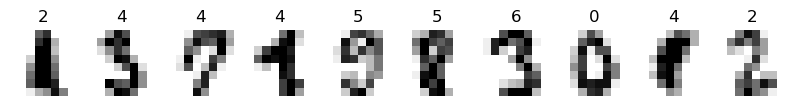

In [5]:
# DEFINE A LinearRegression MODEL USING SKLEARN. ASSIGN THE MODEL TO THE VARIABLE model.
# >
import sklearn.linear_model
model = sklearn.linear_model.LinearRegression()

# FIT THE MODEL AND MAKE PREDICTIONS ON THE TEST SET. ASSIGN THE PREDICTIONS TO THE VARIABLE y_pred.
# >
model.fit(X_train, y_train)
y_pred = ([round(x) for x in model.predict(X_test)])

# ASSIGN YOUR MODEL'S TEST SET MSE TO THE VARIABLE mse AND ITS ACCURACY TO THE VARIABLE acc.
# >
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score

mse = mean_squared_error(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)

# DO NOT INSERT OR CHANGE ANYTHING BELOW
print("LinearRegression MSE: ", mse)
print("LinearRegression accuracy: ", acc)

_, axes = plt.subplots(nrows=1, ncols=10, figsize=(10, 3))
for ax, image, prediction in zip(axes, X_test, y_pred):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("%i" % prediction)

### C: Programming Exercise

Now, let's model the task differently.
You will use the `LogisticRegression`, again included in the module `sklearn.linear_model`, and again, check out the documentation to see how to use it. Fit the model and make predictions on the test set. 

You are asked to produce output with the same structure as in the above programming exercise (two printouts and one image), but for a different model this time.

In [6]:
# YOUR CODE HERE
# >
modelR = sklearn.linear_model.LogisticRegression(max_iter=20000)
modelR.fit(X_train, y_train)
y_predR = ([round(x) for x in modelR.predict(X_test)])


mseR = mean_squared_error(y_test, y_predR)
accR = accuracy_score(y_test, y_predR)
print(mseR)
print(accR)


1.1388888888888888
0.9611111111111111


### Written Questions

1a) Describe the trends you observe in the results. Is there anything interesting or unexpected? 

1b) How do the results compare to the linear regression model? 

1c) What do you think is the reason for this?

## Exercise 3.2: Counting stars

Your team is tasked with applying data science and machine learning techniques to some recently collected telescope image data. The telescope takes low resolution images, in which stars either appear as squares or circles. Your task is to train a classifier to determine whether there are more circular stars than square stars in each image. The budget is tight this year so there are no resources available to train expensive deep neural networks; you will need to train a linear or logistic regression classifier instead.

You are encouraged to be creative, and to try out different things empirically, too. Preprocessing could be crucial to the success of your model. Good luck!

Below is a sample of the data you'll be working with. Above each image is the label, which shows the number of circular and square stars, respectively. We do not count the small noisy background stars. 

![](sample.png)

### D: Programming Exercise

1. Create an account on Kaggle to collect the data https://www.kaggle.com/competitions/ds2023-counting-stars/. Use your real name, or tell us your Kaggle username, so we can grade you.
2. Download the training data from https://www.kaggle.com/competitions/ds2023-counting-stars/data. Check out the Dataset Description for more information about the data and your task.
2. Load the training data file `stars_train_X_y.npz` and split it into `train`, `val`, and `test` splits.
3. Use a linear or logistic regression model to fit the `train` data. Use the `val` and `test` splits for model selection and hyperparameter optimization. (You should measure performance using accuracy).

[3, 1, 5, 2, 4, 0, 4, 4, 4, 2, 4, 2, 3, 0, 0, 2, 2, 4, 2, 0, 2, 5, 4, 4, 4, 4, 4, 5, 3, 4, 1, 4, 4, 4, 0, 4, 4, 2, 2, 4, 2, 2, 1, 3, 5, 0, 6, 0, 5, 2, 4, 1, 6, 4, 4, 5, 0, 3, 2, 2, 4, 4, 4, 6, 2, 2, 3, 1, 2, 4, 2, 1, 0, 2, 2, 6, 2, 6, 4, 3, 5, 6, 4, 0, 4, 2, 0, 6, 5, 4, 2, 4, 5, 2, 2, 4, 2, 5, 4, 2, 4, 1, 2, 3, 6, 0, 3, 3, 4, 4, 6, 4, 5, 4, 4, 4, 2, 4, 2, 2, 0, 6, 4, 4, 4, 1, 5, 2, 3, 2, 3, 4, 6, 2, 6, 5, 3, 5, 2, 0, 2, 3, 4, 3, 5, 1, 4, 5, 5, 6, 4, 2, 0, 0, 1, 2, 4, 4, 6, 2, 5, 4, 0, 4, 2, 3, 0, 6, 2, 4, 5, 2, 4, 0, 0, 5, 3, 1, 3, 3, 6, 6, 1, 0, 0, 2, 0, 0, 2, 4, 4, 4, 4, 6, 2, 2, 4, 5, 4, 4, 0, 3, 3, 0, 2, 2, 2, 1, 4, 4, 6, 5, 5, 4, 0, 4, 1, 2, 2, 0, 2, 1, 4, 2, 3, 0, 1, 5, 2, 0, 2, 6, 3, 5, 0, 5, 2, 4, 6, 4, 4, 2, 3, 3, 4, 4, 3, 0, 2, 4, 1, 6, 3, 1, 4, 4, 5, 2, 2, 4, 4, 4, 6, 5, 4, 5, 5, 1, 2, 2, 1, 5, 2, 2, 6, 2, 1, 4, 2, 2, 0, 2, 0, 0, 5, 4, 2, 4, 1, 2, 4, 3, 0, 2, 6, 4, 5, 2, 3, 4, 4, 2, 2, 2, 5, 4, 5, 5, 4, 2, 0, 1, 5, 1, 3, 4, 1, 4, 2, 2, 0, 4, 2, 4, 1, 6, 4, 1, 1, 3, 2, 4, 2, 

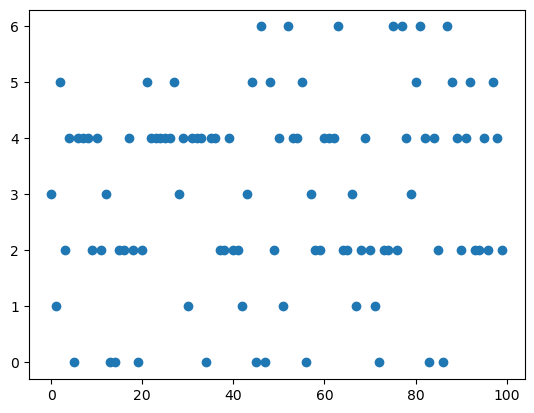

(8000, 4096)


In [7]:
# YOUR CODE HERE
# >
import numpy as np

data = np.load('stars_train_X_y.npz')
X = data['X_train'] #   np.ndarray of size (8000, 4096),  flattened image (64x64) of the night sky.
y = data['y_train'] #   np.ndarray of size (8000, 2), number of circular stars and number square stars

(X_train, X_temp, y_train, y_temp) = train_test_split(data['X_train'], data['y_train'], test_size=0.2, random_state=0, shuffle = True)
(X_test, X_val, y_test, y_val) = train_test_split(X_temp, y_temp, test_size=0.5, random_state=0, shuffle = True)

def shapePredList(inp, elm):
    n = [round((t[elm])/2) for t in inp]
    return n 

def shapeList(inp, elm):
    n = [(t[elm]) for t in inp]
    return n 

cLstTrain = shapePredList(y_train, 0)
cLstTest = shapePredList(y_test, 0)
sLstTrain = shapePredList(y_train, 1)
sLstTest = shapePredList(y_test, 1)

squareRealTest = shapeList(y_test, 1)
circularRealTest = shapeList(y_test, 0)
print(cLstTrain)
print(sLstTrain)

from matplotlib import pyplot as plt
def plot():
    y_values = cLstTrain[:100]
    x_values = range(len(y_values))
    plt.scatter(x_values, y_values)
    plt.show()
plot()

print(X.shape)

In [60]:
import cv2
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Binarizer
from sklearn.preprocessing import PowerTransformer

## preprocessing
def scaler(inp):
    scaler = MinMaxScaler()
    X_scaled = scaler.fit_transform(inp) 
    return X_scaled

def PowerTransformerer(inp):
    scaler = PowerTransformer()
    X_transformed = scaler.fit_transform(inp)
    return X_transformed

#set grid search
paramGrid = {
    'penalty': ['l1', 'l2'],
    'C': [0.1, 1, 10, 100]
}

#Cut list down
testXtrain = PowerTransformerer(X_train)
testYtrain = y_train

testXtest = X_test
testYTest = y_test

#get y circ and sqr
circTestYtrain = shapeList(testYtrain, 0)
sqrTestYtrain = shapeList(testYtrain, 1)

circTestYTest = shapeList(testYTest, 0)
sqrTestYTest = shapeList(testYTest, 1)

def predictCircular(trainX_, trainY_, testX_, testY_ ):
    model = sklearn.linear_model.LogisticRegression(random_state=0, max_iter=1000)
    #model_search = GridSearchCV(model, paramGrid, cv=5)
    model.fit(trainX_, trainY_)
    pred = model.predict(testX_)
    MSE = mean_squared_error(testY_, pred)
    ACC = accuracy_score(testY_, pred)
    print("MSE : " + str(MSE))
    print("ACC : " + str(ACC) )
    return pred

#Count circles
predictCircular(testXtrain, circTestYtrain, testXtest, circTestYTest)

MSE : 25.32875
ACC : 0.1025


array([ 9., 10., 11., 11., 11., 10., 11., 10., 11., 10., 10., 11., 11.,
       10., 10.,  9., 11., 11.,  8., 11., 10., 10.,  9., 11., 10., 11.,
       10., 11., 10., 10., 11., 11., 11., 11., 10., 11.,  9.,  8., 11.,
       11., 10., 11.,  9.,  9., 11., 10., 11., 11., 11., 10.,  8., 10.,
       11., 11., 11., 11.,  8., 10., 11., 10.,  9., 10., 10., 10., 10.,
       10., 10., 11., 10., 10., 10., 10., 10., 10., 11., 11., 10.,  9.,
       10.,  9., 10.,  7., 10.,  8.,  9., 10., 11., 10.,  8., 11., 11.,
       10.,  9.,  9.,  9., 10.,  8., 11., 11., 10.,  9., 11., 10., 10.,
       10.,  8., 11., 11., 10., 10.,  9.,  7.,  9., 10., 10., 11., 10.,
       11., 11., 11., 11., 10., 10., 10., 11., 10.,  9.,  7.,  9., 10.,
       11.,  9., 11., 10., 10., 11., 11., 10., 10., 10., 10., 11.,  9.,
       10., 10., 11., 11.,  9., 10.,  7., 10., 11.,  9., 10., 11.,  9.,
       11.,  8., 10., 10., 10., 10., 11.,  9., 11.,  9., 11., 10., 11.,
       10.,  9., 11., 11., 10., 11., 10., 11.,  8., 11., 11., 11

In [62]:
#Code for circular predictions 
from sklearn.model_selection import GridSearchCV

param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.1, 1, 10, 100]
}


def predictCircular():
    model = sklearn.linear_model.LogisticRegression(random_state=0, max_iter=1500)
    model_search = GridSearchCV(model, param_grid, cv=5)
    model_search.fit(X_train, cLstTrain)
    pred = model_search.predict(X_test)
    MSE = mean_squared_error(cLstTest, pred)
    ACC = accuracy_score(cLstTest, pred)
    print("MSE : " + str(MSE))
    print("ACC : " + str(ACC) )
    return pred

def predictSquare():
    model = sklearn.linear_model.LogisticRegression(random_state=0, max_iter=1500)
    model_search = GridSearchCV(model, param_grid, cv=5)
    model_search.fit(X_train, sLstTrain)
    pred = model_search.predict(X_test)
    MSE = mean_squared_error(sLstTest, pred)
    ACC = accuracy_score(sLstTest, pred)
    print("MSE : " + str(MSE))
    print("ACC : " + str(ACC) )
    return pred

testCircPred = predictCircular()
testSqrePred = predictSquare()

c:\Users\alx26\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
20 fits failed out of a total of 40.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\alx26\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\alx26\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "c:\Users\alx26\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 447, in _check_solver
    raise ValueError(
Valu

MSE : 2.09375
ACC : 0.31


c:\Users\alx26\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
20 fits failed out of a total of 40.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\alx26\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\alx26\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "c:\Users\alx26\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 447, in _check_solver
    raise ValueError(
Valu

MSE : 3.33
ACC : 0.3


In [63]:
def something(CircPred, SqrePred):
    lst = []
    for i in range (0, len(CircPred)):
        if CircPred[i] > SqrePred[i]: 
            n = 1
            lst.append([n])
        else:
            n = 0
            lst.append([n])
    return lst
predictions = (something(testCircPred, testSqrePred))
realValues = (something(circularRealTest, squareRealTest))

print(predictions)
print(realValues)
print(accuracy_score(realValues, predictions))


[[0], [0], [0], [1], [0], [0], [0], [1], [0], [0], [0], [0], [1], [1], [0], [0], [0], [0], [0], [0], [1], [0], [0], [0], [0], [1], [0], [0], [0], [0], [0], [0], [0], [1], [0], [1], [0], [0], [0], [0], [0], [0], [0], [0], [1], [0], [0], [0], [0], [0], [0], [0], [1], [0], [0], [0], [1], [0], [0], [0], [0], [0], [0], [1], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [1], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [1], [1], [0], [0], [0], [0], [0], [0], [0], [1], [0], [0], [0], [0], [0], [0], [0], [0], [1], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [1], [0], [0], [0], [0], [0], [0], [0], [0], [0], [1], [0], [1], [0], [1], [0], [1], [0], [1], [0], [0], [1], [0], [0], [1], [0], [1], [0], [1], [0], [0], [0], [0], [0], [0], [1], [0], [0], [1], [0], [0], [0], [1], [0], [0], [1], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [1], [1], [0], [0], [0], [0], [0], [0], [0], [0], [1], [0], [0], [0], [0], [0], [0], [0], [0], [0],

In [25]:
#If this works I quit...
def compare(inp):
    def sqrOrCirc(input, elm):
        n = [round((t[elm])/2) for t in input]
        return n 
    circ = sqrOrCirc(inp, 0)
    sqr = sqrOrCirc(inp, 1)

    lst = []
    for i in range (0, len(circ)):
        if circ[i] > sqr[i]: 
            n = 1
            lst.append([n])
        else:
            n = 0
            lst.append([n])
    return lst

Ytrain = (compare(y_train))
Ytest = (compare(y_test))

def predictor(xTrainData, yTrainData):
    model = sklearn.linear_model.LogisticRegression(random_state=0, max_iter=1000)
    model_search = GridSearchCV(model, param_grid, cv = 10)
    return model_search.fit(xTrainData, yTrainData)


# predictionModel = predictor(X_train, Ytrain)

# pred = predictionModel.predict(X_test)
# MSE = mean_squared_error(Ytest, pred)
# ACC = accuracy_score(Ytest, pred)
# print("MSE : " + str(MSE))
# print("ACC : " + str(ACC) )



[[0], [0], [1], [0], [1], [0], [0], [0], [0], [0], [1], [0], [0], [0], [0], [0], [0], [1], [0], [0], [0], [1], [0], [0], [0], [1], [0], [0], [0], [0], [0], [1], [0], [1], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [1], [0], [0], [0], [1], [0], [0], [0], [1], [0], [1], [1], [0], [0], [0], [0], [0], [1], [0], [1], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [1], [0], [1], [1], [0], [1], [1], [0], [0], [0], [0], [0], [1], [1], [0], [0], [0], [1], [0], [0], [1], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [1], [1], [0], [0], [0], [1], [0], [1], [1], [1], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [1], [0], [0], [0], [0], [0], [1], [1], [0], [1], [0], [0], [0], [1], [1], [1], [1], [0], [1], [0], [0], [1], [0], [0], [0], [0], [0], [0], [0], [0], [1], [0], [1], [0], [0], [0], [0], [0], [0], [1], [0], [0], [1], [0], [0], [0], [0], [1], [0], [0], [0], [0], [1], [1], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [1], [1], [0], [0], [0], [0], [0], [1],

### E: Unlabelled data evaluation

You should download the unlabeled test data from https://www.kaggle.com/competitions/ds2023-counting-stars/data and make predictions for all of the unlabeled images in the test set. You can submit your best predictions to Kaggle three times/day.

The course responsible has submitted a naive baseline and we're sure you can beat that score! This programming exercise is considered passed if you achieve  $\text{Score} \ge 0.90$ on the leaderboard.

In [11]:
# LOAD THE TEST SET AND MAKE PREDICTIONS. ASSIGN THE PREDICTIONS TO THE VARIABLE y_pred.
# >

output_file = "prediction.csv"
# DO NOT INSERT OR CHANGE ANYTHING BELOW
import numpy as np
# Use this function to save your predictions on stars_test_X.npz to a "prediction.csv" file.
# The produced csv file can be directly uploaded to Kaggle for evaluation.
def y_pred_to_kaggle_format (y_pred : np.ndarray) -> None:
    np.c_[np.arange(1, len(y_pred)+1), y_pred]
    np.savetxt(output_file, np.c_[np.arange(1, len(y_pred)+1), y_pred], fmt='%i', delimiter=",", header="Id,Category", comments='')

y_pred_to_kaggle_format(y_pred)

# NOW YOU CAN UPLOAD THE prediction.csv FILE TO KAGGLE AND SEE YOUR ACCURACY

### Written Questions

2a) Explain the different techniques and their purpose in your code for Programming Exercise D.

2b) Which techniques were not useful in improving performance on this task?